In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)

# Credit Card Default (Taiwan)


## Read Data


https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models

There are 25 variables:

ID: ID of each client  <br> 
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br> 
SEX: Gender (1=male, 2=female) <br> 
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br> 
MARRIAGE: Marital status (1=married, 2=single, 3=others) <br> 
AGE: Age in years <br> 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) <br> 
PAY_2: Repayment status in August, 2005 (scale same as above  <br> 
PAY_3: Repayment status in July, 2005 (scale same as above) <br> 
PAY_4: Repayment status in June, 2005 (scale same as above) <br> 
PAY_5: Repayment status in May, 2005 (scale same as above) <br> 
PAY_6: Repayment status in April, 2005 (scale same as above) <br> 
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br> 
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br> 
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br> 
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br> 
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br> 
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br> 
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br> 
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br> 
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br> 
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br> 
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br> 
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 
default.payment.next.month: Default payment (1=yes, 0=no) (October 2005) <br> 


In [4]:
# Load the data

data_df = pd.read_csv('../data/Taiwan/UCI_Credit_Card.csv', skiprows=1)
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Check for missing data:

In [7]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default payment next month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Exploaration

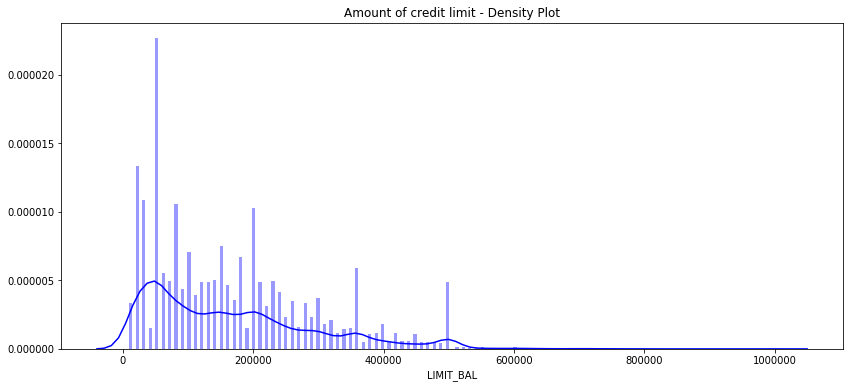

In [8]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Credit Limit is the limit amount in the credit card (rolling credit with a limit)